# TP OpenMP - October 2022
## Part 1 : Pi
### Compilation

Louis Crouz
Thomas Di Bianca

Nos conclusions sont en partie basée sur les courbes de Cyril GOmes et Benoit Algourdin, l'exécution des tests mettant plus de 30 minutes pour la moitié des calculs en connexion à distance pour la partie 1

In [ ]:
!g++ -o tp_openmp_part_11_critical tp_openmp_part_11_critical.cpp -fopenmp -O3 -march=native
!g++ -o tp_openmp_part_12_atomic tp_openmp_part_12_atomic.cpp -fopenmp -O3 -march=native
!g++ -o tp_openmp_part_13_reduction tp_openmp_part_13_reduction.cpp -fopenmp -O3 -march=native
!g++ -o tp_openmp_part_14_array tp_openmp_part_14_array.cpp -fopenmp -O3 -march=native

### Evaluation des performance en fonction du nombre de steps 

In [ ]:
import os
import subprocess

try:
    os.remove("stats_pi.csv")
except OSError:
    pass

num_steps = [1000000, 100000000, 10000000000]#, 1000000000000]
nb_core = [1, 2, 4, 8]
repeats = range(0,10)

for nrepeats in repeats:
    for nsteps in num_steps:
        for ncore in nb_core:

            args = ("./tp_openmp_part_11_critical", "-C", str(ncore), "-N", str(nsteps))
            popen = subprocess.Popen(args, stdout=subprocess.PIPE)
            popen.wait()

            args = ("./tp_openmp_part_12_atomic", "-C", str(ncore), "-N", str(nsteps))
            popen = subprocess.Popen(args, stdout=subprocess.PIPE)
            popen.wait()

            args = ("./tp_openmp_part_13_reduction", "-C", str(ncore), "-N", str(nsteps))
            popen = subprocess.Popen(args, stdout=subprocess.PIPE)
            popen.wait()

            args = ("./tp_openmp_part_14_array", "-C", str(ncore), "-N", str(nsteps))
            popen = subprocess.Popen(args, stdout=subprocess.PIPE)
            popen.wait()



            

### Affichage graphique des performances

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import genfromtxt

import pandas as pd

import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('result_log.csv',header=None,names=['version','nbcore','num_steps','runtime'],dtype={
                     'version': str,
                     'nbcore': int,
                     'num_steps' : int,
                     'runtime' : float
                 })

color_num_steps = {1000000 : "blue", 100000000 : "red", 10000000000 : "green", 1000000000000 : "black"}

for num_steps in df['num_steps']:

   df_plot = df[(df['num_steps'] == int(num_steps))]
   df_plot = df_plot[df_plot['version'] == "atomic"]
    
   mean_stats = df_plot.groupby(['num_steps','version','nbcore']).mean().reset_index()
    
   plt.plot(mean_stats['nbcore'], mean_stats['runtime'],linestyle="solid",color=color_num_steps[num_steps])
   plt.yscale('log')
   plt.scatter(df_plot['nbcore'], df_plot['runtime'],color=color_num_steps[num_steps])
    
   df_plot = df[(df['num_steps'] == num_steps) & (df['version'] == "reduce")]
   mean_stats = df_plot.groupby(['num_steps','version','nbcore']).mean().reset_index()
    
   plt.plot(mean_stats['nbcore'], mean_stats['runtime'],linestyle="dashed",color=color_num_steps[num_steps])
   plt.yscale('log')
   plt.scatter(df_plot['nbcore'], df_plot['runtime'],color=color_num_steps[num_steps])

   df_plot = df[(df['num_steps'] == num_steps) & (df['version'] == "critical")]
   mean_stats = df_plot.groupby(['num_steps','version','nbcore']).mean().reset_index()
    
   plt.plot(mean_stats['nbcore'], mean_stats['runtime'],linestyle="dotted",color=color_num_steps[num_steps])
   plt.yscale('log')
   plt.scatter(df_plot['nbcore'], df_plot['runtime'],color=color_num_steps[num_steps])

   df_plot = df[(df['num_steps'] == num_steps) & (df['version'] == "array")]
   mean_stats = df_plot.groupby(['num_steps','version','nbcore ']).mean().reset_index()
    
   plt.plot(mean_stats['nbcore'], mean_stats['runtime'],linestyle="dashdot",color=color_num_steps[num_steps])
   plt.yscale('log')
   plt.x
   plt.scatter(df_plot['nbcore'], df_plot['runtime'],color=color_num_steps[num_steps])

plt.xlabel('nombre thread')
plt.ylabel('runtime')
plt.show()

### Conclusion

On remarque que les deux implémentations avec des reductions sont beaucoup plus performantes que celles de critical et atomic. On peut noter que l'augmentation du nombre de thread à part leur nature un impact négatif sur leur performance.

On peut également voir sur les courbes que l'implémentation reduce est plus performante que celle avec plusieurs réductions ( ici appelé array) pour un nombre de coeurs faible ceci est en partie due au atomic qui est couteux en performances.
Cependant plus le nombre de coeurs augmente plus array devient performante le coût d atomic étant compensait par la rapidité de calcul.

## Part 2 : Matrix-Vector operation

### Compilation

In [ ]:
!g++ -o tp_openmp_part_21_sequential tp_openmp_part_21_sequential.cpp -fopenmp -O3 -march=native
!g++ -o tp_openmp_part_25_pragma tp_openmp_part_25_pragma.cpp -fopenmp -O3 -march=native
!g++ -o tp_openmp_part_29_SIMD tp_openmp_part_29_SIMD.cpp -fopenmp -O3 -march=native

### Evaluation des performences

avec :
* N : 2, 4, 8, 10, 12, 14, 16
* M : 1, 3, 7, 9, 11, 13, 15

In [24]:
import os
import subprocess

try:
    os.remove("stats_vector.csv")
except OSError:
    pass

array_N = [2, 4, 8, 10, 12, 14, 16]
array_M = [1, 3, 7, 9, 11, 13, 15]
nbcore =[1, 2, 4, 8] 

for N in array_N:
    M = N-1
    for ncore in nbcore:

        args = ("./tp_openmp_part_21_sequential", "-N", str(N), "-M", str(N), "-C", str(ncore))
        popen = subprocess.Popen(args, stdout=subprocess.PIPE)
        popen.wait()

        args = ("./tp_openmp_part_25_pragma", "-N", str(N), "-M", str(N), "-C", str(ncore))
        popen = subprocess.Popen(args, stdout=subprocess.PIPE)
        popen.wait()

        args = ("./tp_openmp_part_29_SIMD", "-N", str(N), "-M", str(N), "-C", str(ncore))
        popen = subprocess.Popen(args, stdout=subprocess.PIPE)
        popen.wait()

### Affichage graphique des performances

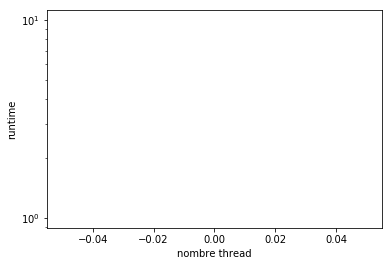

In [30]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import genfromtxt

import pandas as pd

import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('stats_vector.csv',header=None,names=['version','nbcore', 'N','M','nrepeat', 'runtime'],dtype={
                     'version': str,
                     "nbcore": int
                     'N': float,
                     'M' : float,
                     'nrepeat' : float,
                     'runtime' : float
                 })

color_N = {2**2 : "blue", 2**4 : "red", 2**8 : "green", 2**10 : "black", 2**12 : "purple", 2**14 :"pink", 2**16:"orange"}

for N in df['N']:
    df_plot = df[(df['N'] == float(N))]
    df_plot = df_plot[df_plot['version'] == "sequential"]
    
    mean_stats = df_plot.groupby(['N','version','nbcore']).mean().reset_index()
    
    plt.plot(mean_stats['N'], mean_stats['runtime'],linestyle="solid",color=color_N[N])
    plt.yscale('log')
    plt.scatter(df_plot['nbcore'], df_plot['runtime'],color=color_N[N])

    df_plot = df[(df['N'] == N) & (df['version'] == "pragma")]
    mean_stats = df_plot.groupby(['N','version','nbcore']).mean().reset_index()
    
    plt.plot(mean_stats['nbcore'], mean_stats['runtime'],linestyle="dashed",color=color_N[N])
    plt.yscale('log')
    plt.scatter(df_plot['nbcore'], df_plot['runtime'],color=color_N[N])

    df_plot = df[(df['N'] == N) & (df['version'] == "SIMD")]
    mean_stats = df_plot.groupby(['N','version','nbcore']).mean().reset_index()
    
    plt.plot(mean_stats['nbcore'], mean_stats['runtime'],linestyle="dotted",color=color_N[N])
    plt.yscale('log')
    plt.scatter(df_plot['nbcore'], df_plot['runtime'],color=color_N[N])
    
plt.xlabel('nombre thread')
plt.ylabel('runtime')
plt.show()

### Conculsion

On remarque que l'implémentation séquentiel est la plus rapide peu importe le nombre de coeurs lorsque N est petit et cependant lorsque N augmente l'implémentation séquentiel devient beaucoup moins performante au profit des implémentations avec réduction. L'implémentation avec réduction devient plus performante lorsque le nombre de thread augmente cependant pour un grand N la différence entre pragma et simd est négligeable